In [1]:
import sys
sys.path.append("..")
import helpers
import feather
import numpy as np
from collections import Counter
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [82]:
df_train = feather.read_dataframe("data/df_train.feather")

# Numeric

## flat_size

### Outliers

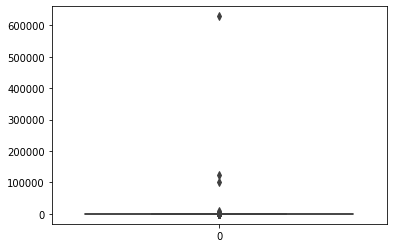

In [4]:
sns.boxplot(data=df_train.flat_size)

In [5]:
from sklearn.cluster import DBSCAN

def outlier_detection(data_df_series):
    outliers_detect = DBSCAN(min_samples = 2, eps = 3)
    clusters = outliers_detect.fit_predict((np.array(data_df_series)).reshape(-1, 1))
    indexes = np.where(clusters==-1)[0]
    values = data_df_series.loc[indexes].values
    return indexes, values


In [6]:
outliers_indexes, outliers_values = outlier_detection(df_train.flat_size)

In [7]:
print("Outliers values by DBSCAN: {}".format(", ".join([str(i) for i in sorted(outliers_values)])))

Outliers values by DBSCAN: 6, 216, 270, 280, 585, 8289, 101000, 125000, 628618


In [8]:
med = np.median(df_train.flat_size)
exclude_gt = min([i for i in outliers_values if i > med])
exclude_lt = max([i for i in outliers_values if i < med])

#save 
outliers = {}
outliers['flat_size']= {"min": exclude_lt, "max": exclude_gt}
outliers

print("Exclude when flat size less then {}, and more then {}".format(exclude_lt, exclude_gt))

Exclude when flat size less then 6, and more then 216


### Missing

In [9]:
Counter(df_train.flat_size.isna())

Counter({False: 31477})

### Plot

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

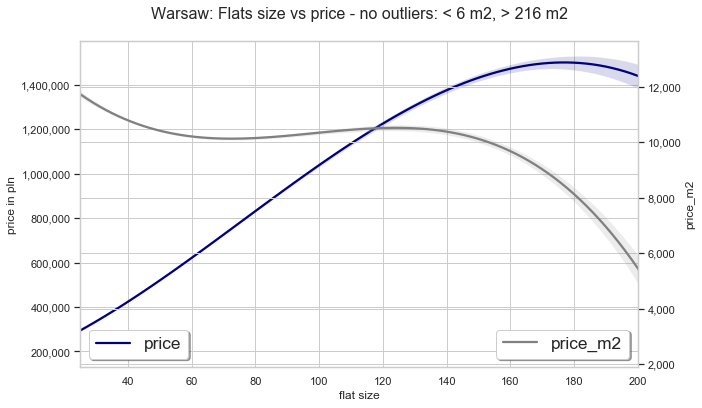

In [10]:
sns.set(style="whitegrid")
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.regplot(data=df_train.query("flat_size>{} and flat_size<{}".format(exclude_lt,exclude_gt)),
             x='flat_size', y='price',ax=ax1,color='navy',label='price', scatter=False, order=3, truncate=True)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.regplot(data=df_train.query("flat_size>{} and flat_size<{}".format(exclude_lt,exclude_gt)),
             x='flat_size', y='price_m2',ax=ax2,color='grey',label='price_m2', scatter=False, order=3, truncate=True)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Warsaw: Flats size vs price - no outliers: < {} m2, > {} m2'.format(exclude_lt,exclude_gt), y=1.05, fontsize = 16)
plt.xlim(25,200)
ax1.set(xlabel='flat size', ylabel='price in pln')
legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-large')
legend = ax2.legend(loc='lower right', shadow=True, fontsize='x-large')
print("")



## GC_longitude (lewa i prawa strona Wisły)

### Outliers

Polands longitude is between 14 and 24

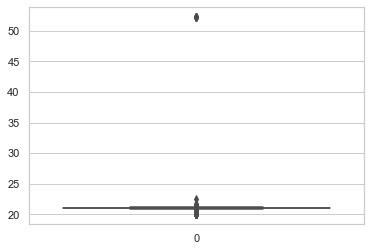

In [11]:
sns.boxplot(data=df_train.GC_longitude)

In [12]:
print(Counter(df_train.GC_longitude > 21.5))
print(Counter(df_train.GC_longitude < 20.5))

Counter({False: 31465, True: 12})
Counter({False: 31449, True: 28})


In [13]:
outliers['GC_longitude'] = {"min":20.5,"max":21.5}

### Missing

In [14]:
Counter(df_train.GC_longitude.isna())

Counter({False: 31477})

### Plot

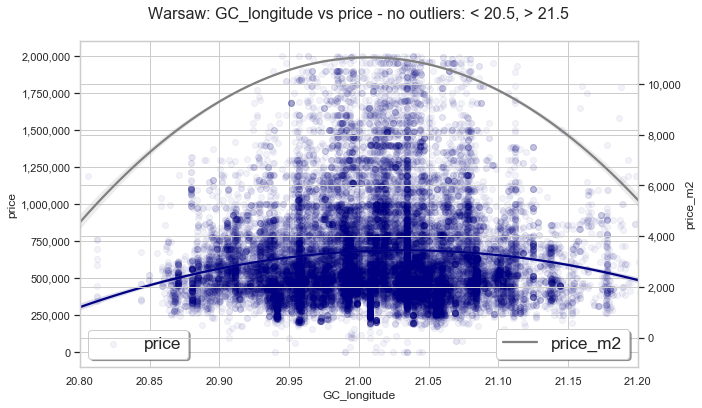

In [15]:
sns.set(style="whitegrid")
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.regplot(data=df_train.query("GC_longitude>={} and GC_longitude<={}".format(
        outliers['GC_longitude']['min'],
        outliers['GC_longitude']['max'])),
             x='GC_longitude', y='price',ax=ax1,color='navy',label='price', 
             scatter=True, order=2, truncate=True,scatter_kws={'alpha':0.05})
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.regplot(data=df_train.query("GC_longitude>={} and GC_longitude<={}".format(
        outliers['GC_longitude']['min'],
        outliers['GC_longitude']['max'])),
             x='GC_longitude', y='price_m2',ax=ax2,color='grey',label='price_m2', scatter=False, order=2, truncate=True)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Warsaw: GC_longitude vs price - no outliers: < {}, > {}'.format(
    outliers['GC_longitude']['min'],outliers['GC_longitude']['max']), y=1.05, fontsize = 16)
ax1.set(xlabel='GC_longitude', ylabel='price')
ax1.set_xlim(20.8, 21.2)
ax1.set_ylim()
ax1.set_ylim()

legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-large')
legend = ax2.legend(loc='lower right', shadow=True, fontsize='x-large')
print("")



## GC_longitude (północ i południe Warszawy)

Polands longitude is between 49 and 55

### Outliers

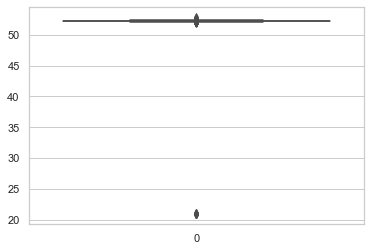

In [16]:
sns.boxplot(data=df_train.GC_latitude)

In [17]:
outliers['GC_latitude'] = {"min":51,"max":52.5}

### Missing


In [18]:
Counter(df_train.GC_latitude.isna())

Counter({False: 31477})

### Plot

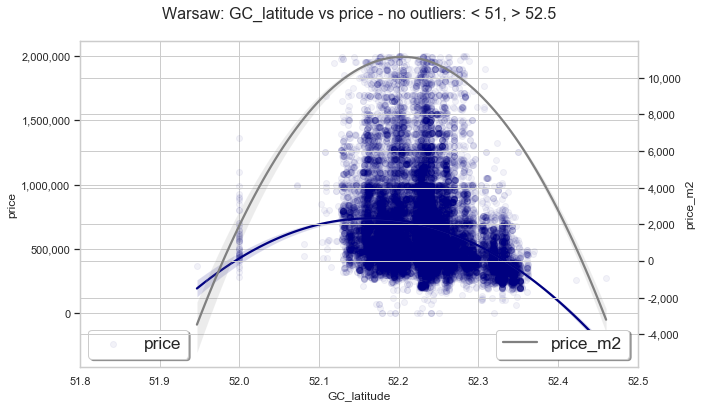

In [19]:
sns.set(style="whitegrid")
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.regplot(data=df_train.query("GC_latitude>={} and GC_latitude<={}".format(
        outliers['GC_latitude']['min'],
        outliers['GC_latitude']['max'])),
             x='GC_latitude', y='price',ax=ax1,color='navy',label='price', 
             scatter=True, order=2, truncate=True,scatter_kws={'alpha':0.05})
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.regplot(data=df_train.query("GC_latitude>={} and GC_latitude<={}".format(
        outliers['GC_latitude']['min'],
        outliers['GC_latitude']['max'])),
             x='GC_latitude', y='price_m2',ax=ax2,color='grey',label='price_m2', scatter=False, order=2, truncate=True)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Warsaw: GC_latitude vs price - no outliers: < {}, > {}'.format(
    outliers['GC_latitude']['min'],outliers['GC_latitude']['max']), y=1.05, fontsize = 16)
ax1.set(xlabel='GC_latitude', ylabel='price')
ax1.set_xlim(51.8, 52.5)

legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-large')
legend = ax2.legend(loc='lower right', shadow=True, fontsize='x-large')
print("")



## rooms

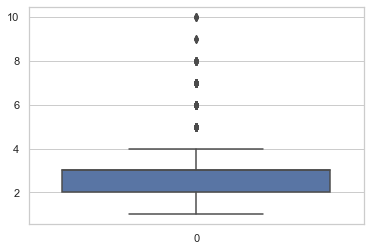

In [20]:
sns.boxplot(data=df_train.rooms)


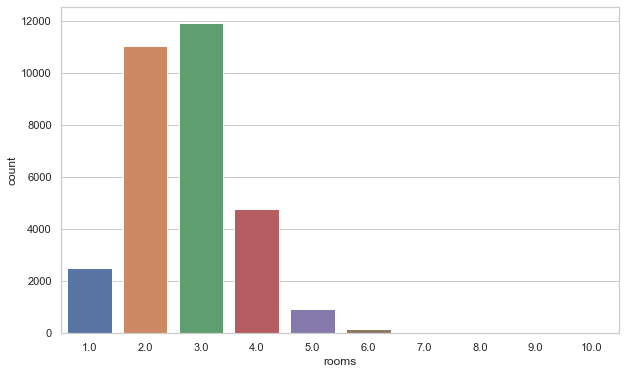

In [21]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.countplot(df_train.rooms)

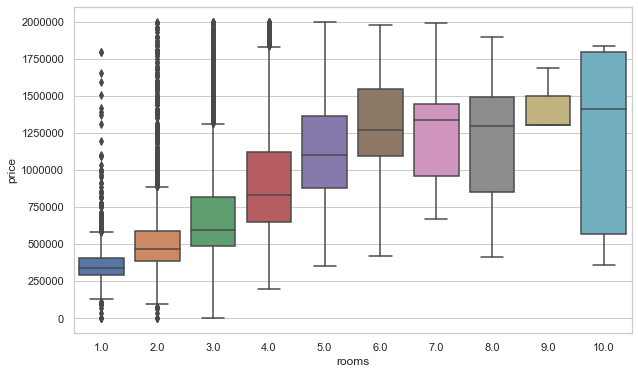

In [22]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.boxplot(data=df_train, x='rooms',y='price')

## year_of_building

### missing

In [23]:
print("Missing values of 'year_of_building' is {0:.0%} percent".format(
    sum(df_train.year_of_building.isna())/len(df_train.year_of_building.isna())))


Missing values of 'year_of_building' is 17% percent


In [24]:
outliers_indexes, outliers_values = outlier_detection(
    df_train.loc[df_train.year_of_building.notna()].reset_index(drop=True).year_of_building)

In [25]:
print("Outliers values by DBSCAN: {}".format(", ".join([str(i) for i in sorted(outliers_values)])))

Outliers values by DBSCAN: 60.0, 76.0, 90.0, 190.0, 976.0, 1029.0, 1092.0, 1770.0, 2109.0, 11996.0, 20000.0, 20119.0


In [26]:
med = np.median(df_train.loc[df_train.year_of_building.notna()].reset_index(drop=True).year_of_building)
exclude_gt = min([i for i in outliers_values if i > med])
exclude_lt = max([i for i in outliers_values if i < med])

#save 
outliers['year_of_building']= {"min": exclude_lt, "max": exclude_gt}

print("Exclude when year_of_building less then {}, and more then {}".format(exclude_lt, exclude_gt))

Exclude when year_of_building less then 1770.0, and more then 2109.0


[Text(0, 0.5, 'year_of_building'), Text(0.5, 0, 'flat size')]

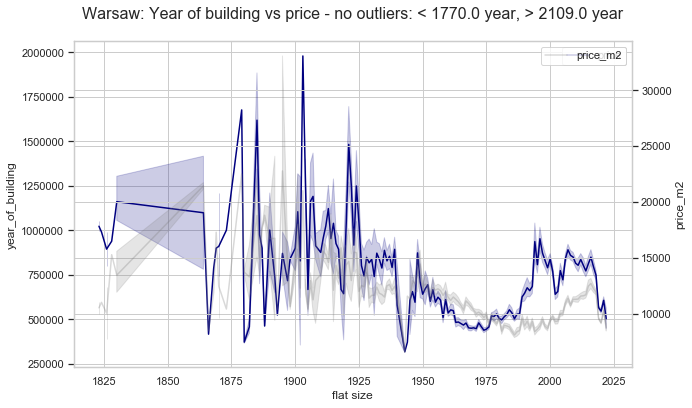

In [27]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.lineplot(data=df_train.loc[df_train.year_of_building.notna()].query(
                "year_of_building>{} and year_of_building<{}".format(exclude_lt,exclude_gt)),
             x='year_of_building', y='price',ax=ax1,color='navy',label='price')

sns.lineplot(data=df_train.loc[df_train.year_of_building.notna()].query(
                "year_of_building>{} and year_of_building<{}".format(exclude_lt,exclude_gt)),
             x='year_of_building', y='price_m2',ax=ax2,color='gray',label='price_m2', alpha=0.3)

plt.title('Warsaw: Year of building vs price - no outliers: < {} year, > {} year'.format(exclude_lt,exclude_gt), y=1.05, fontsize = 16)
ax1.set(xlabel='flat size', ylabel='year_of_building')


### Extract missing from description

In [71]:
def extraxt_year(txt):
    pattern = re.compile(r'[2][0][\d]{2} +|[1][89][\d]{2} +')
    wynik = re.findall(pattern, txt)
    if wynik is None:
        return None
    elif len(wynik)==1:
        return np.int32(wynik[0])
    elif len(wynik)>1:
        return np.int32(min(wynik))
    else:
        return None

In [72]:
df_train=df_train.assign(
    year_of_building_miss = lambda x: x.apply(lambda x: 1 if x.year_of_building==x.year_of_building else 0, axis=1),
    year_of_building = lambda x: x.apply(
        lambda x : x.year_of_building if x.year_of_building==x.year_of_building else extraxt_year(x.description), axis=1)
)

In [73]:
print("Missing values of 'year_of_building' is {0:.0%} percent".format(
    sum(df_train.year_of_building.isna())/len(df_train.year_of_building.isna())))


Missing values of 'year_of_building' is 12% percent


In [76]:
df_train.query("year_of_building != year_of_building")[['description','year_of_building']].sample(10).values

array([['Ostatnie mieszkania w ostatnim etapie tego prestiżowego osiedla! oferta bezpośrednia dewelopera - zapraszam po szczegóły: tel. 509 052 981',
        None],
       ['Przedmiotem sprzedaży jest mieszkanie zlokalizowane na warszawskim Bemowie (Jelonki) przy ul.Szwankowskiego 8 - 5 min piechotą od budowanej stacji II linii Metra Lazurowa. Mieszkanie usytuowane jest na drugim piętrze w 9-piętrowym budynku. Budynek zaopatrzony jest w windę. W bezpośrednim sąsiedztwie znajdują się sklepy, apteka , wjazd na trasę S8 oraz pętla tramwajowo-autobusowa. Przedszkole i Szkoła pod blokiem. Dużym atutem nieruchomości jest bezpośrednie sąsiedztwo z Parkiem Górczewska - tereny rekreacyjne, duże i nowoczesne place zabaw dla dzieci oraz Amfiteatr Bemowo. Mieszkanie ma powierzchnię 46 m2 i składa się z: przedpokoju, salonu z aneksem kuchennym, balkonu, dwóch sypialni oraz łazienki z toaletą. Jest idealne dla pary, pary z dzieckiem lub czteroosobowej rodziny. SALON Z ANEKSEM KUCHENNYM I BALKONEM je

# Category

## GC_addr_postcode

In [33]:
print("number of unique values: {}".format(len(df_train.GC_addr_postcode.unique())))


number of unique values: 2303


###  Missing

In [34]:
Counter(df_train.GC_addr_postcode.isna())

Counter({False: 31272, True: 205})

In [35]:
Counter(df_train.GC_addr_postcode=="")

Counter({False: 31477})

### target encoding

Choose target encoder, later using hyper opt
```
from category_encoders import WOEEncoder, TargetEncoder, CatBoostEncoder, BackwardDifferenceEncoder
from category_encoders import BinaryEncoder,LeaveOneOutEncoder,PolynomialEncoder,SumEncoder
```


## GC_addr_suburb

### Missing

In [36]:
Counter(df_train.GC_addr_suburb.isna())

Counter({False: 31314, True: 163})

[Text(0, 0.5, 'price'), Text(0.5, 0, 'GC_addr_suburb')]

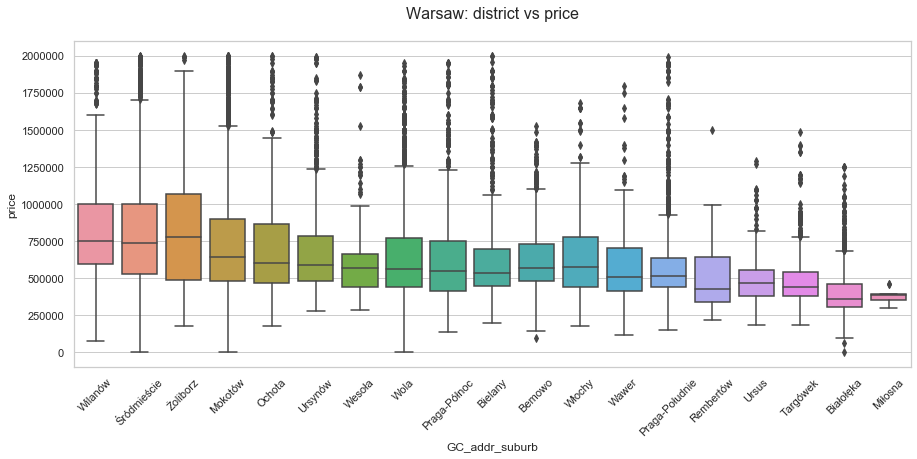

In [37]:
order_list = df_train.groupby('GC_addr_suburb')[['GC_addr_suburb','price']] \
    .agg('mean').reset_index().sort_values('price',ascending=False)['GC_addr_suburb'].tolist()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(15,6))

sns.boxplot(data=df_train, x='GC_addr_suburb',y='price',order=order_list, orient='v')

plt.title('Warsaw: district vs price',y=1.05, fontsize = 16)


plt.xticks(rotation=45)
ax1.set(xlabel='GC_addr_suburb', ylabel='price')

(0, 30000)

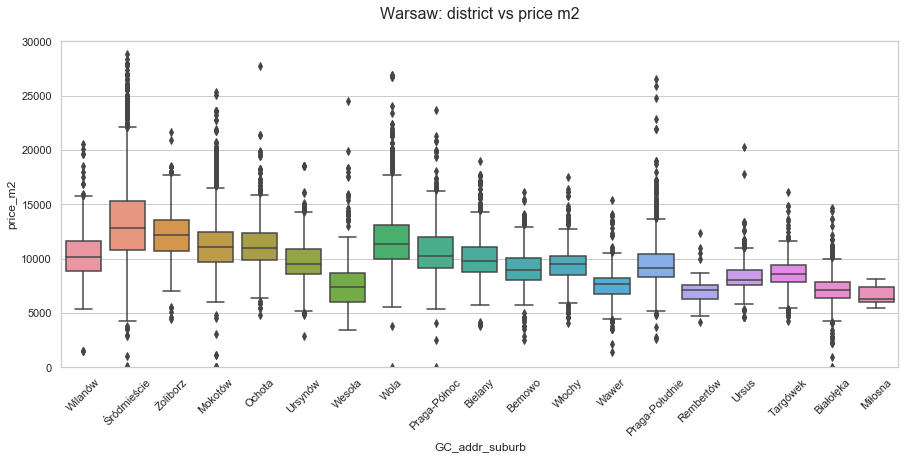

In [38]:
order_list = df_train.groupby('GC_addr_suburb')[['GC_addr_suburb','price']] \
    .agg('mean').reset_index().sort_values('price',ascending=False)['GC_addr_suburb'].tolist()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(15,6))

sns.boxplot(data=df_train, x='GC_addr_suburb',y='price_m2',order=order_list, orient='v')

plt.title('Warsaw: district vs price m2',y=1.05, fontsize = 16)


plt.xticks(rotation=45)
ax1.set(xlabel='GC_addr_suburb', ylabel='price_m2')
ax1.set_ylim(0, 30000)


# Text

## description

In [39]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import lightgbm as lgb

#import eli5


/Users/xszpo/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [40]:
params = {'colsample_bytree': 0.6624318354159208, #feature_fraction
 'learning_rate': 0.15990411055449805,
 'max_bin': 38712,
 'max_depth': 7,
 'min_child_samples': 84, #min_data_in_leaf
 'min_child_weight': 6, #min_sum_hessian_in_leaf
 'n_estimators': 206, #num_iterations
 'num_leaves': 159,
 'reg_alpha': 3.960667919705787e-06, #lambda_l1
 'reg_lambda': 499.85995495490215, #lambda_l2
 'subsample': 0.9022680042341511, #bagging_fraction
 'subsample_for_bin': 144116, #bin_construct_sample_cnt
 'subsample_freq': 0 #bagging_freq
         } 
pipe = make_pipeline(
    ColumnTransformer([
        ('txt_description', TfidfVectorizer(lowercase=True,
                                     ngram_range=(1, 3),
                                     max_features=1000,
                                     dtype=np.float32,
                                     use_idf=True), 'description'),
    ]),
    lgb.LGBMRegressor(**params, objective='regression_l2', random_state=666)
)

In [41]:
%%time
pipe.fit(df_train, df_train.price)


CPU times: user 2min 31s, sys: 4.02 s, total: 2min 35s
Wall time: 1min 7s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('txt_description', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float32'>, encoding='utf...     silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,
       subsample_freq=0))])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error
y_pred = pipe.predict(df_train)

r2 = r2_score(df_train.price, y_pred)
med_abs_err = median_absolute_error(df_train.price, y_pred)
mean_abs_err = mean_absolute_error(df_train.price, y_pred)
print("Train set r2 score {}, median absolute error {}, "
      "mean absolute error {}".format(round(r2, 4), int(med_abs_err),
                                      int(mean_abs_err)))

Train set r2 score 0.7308, median absolute error 81803, mean absolute error 118662


In [43]:
from eli5 import show_weights, explain_weights_lightgbm
explain_weights_lightgbm(pipe.named_steps['lgbmregressor'], 
             feature_names = pipe.named_steps['columntransformer'].get_feature_names(),
             top=50,)

Weight,Feature
0.2379,txt_description__apartament
0.0315,txt_description__apartamentu
0.0312,txt_description__garażu
0.0268,txt_description__sypialnie
0.0250,txt_description__kamienicy
0.0218,txt_description__taras
0.0189,txt_description__podziemnym
0.0148,txt_description__mieszkanie
0.0131,txt_description__kamienica
0.0130,txt_description__garderoba


## info

In [44]:
params = {'colsample_bytree': 0.6624318354159208, #feature_fraction
 'learning_rate': 0.15990411055449805,
 'max_bin': 38712,
 'max_depth': 7,
 'min_child_samples': 84, #min_data_in_leaf
 'min_child_weight': 6, #min_sum_hessian_in_leaf
 'n_estimators': 206, #num_iterations
 'num_leaves': 159,
 'reg_alpha': 3.960667919705787e-06, #lambda_l1
 'reg_lambda': 499.85995495490215, #lambda_l2
 'subsample': 0.9022680042341511, #bagging_fraction
 'subsample_for_bin': 144116, #bin_construct_sample_cnt
 'subsample_freq': 0 #bagging_freq
         } 
pipe = make_pipeline(
    ColumnTransformer([
        ('txt_info', TfidfVectorizer(lowercase=True,
                                     ngram_range=(1, 3),
                                     max_features=1000,
                                     dtype=np.float32,
                                     use_idf=True), 'info'),
    ]),
    lgb.LGBMRegressor(**params, objective='regression_l2', random_state=666)
)

In [45]:
%%time
pipe.fit(df_train, df_train.price)


CPU times: user 36.5 s, sys: 1.1 s, total: 37.6 s
Wall time: 11.1 s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('txt_info', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float32'>, encoding='utf-8', in...     silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,
       subsample_freq=0))])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error
y_pred = pipe.predict(df_train)

r2 = r2_score(df_train.price, y_pred)
med_abs_err = median_absolute_error(df_train.price, y_pred)
mean_abs_err = mean_absolute_error(df_train.price, y_pred)
print("Train set r2 score {}, median absolute error {}, "
      "mean absolute error {}".format(round(r2, 4), int(med_abs_err),
                                      int(mean_abs_err)))

Train set r2 score 0.368, median absolute error 137023, mean absolute error 189152


In [47]:
from eli5 import show_weights, explain_weights_lightgbm
explain_weights_lightgbm(pipe.named_steps['lgbmregressor'], 
             feature_names = pipe.named_steps['columntransformer'].get_feature_names(),
             top=30,)

Weight,Feature
0.1944,txt_info__blok
0.0856,txt_info__pierwotny
0.0472,txt_info__building_type apartamentowiec
0.0378,txt_info__drewniane
0.0340,txt_info__plastikowe
0.0298,txt_info__taras
0.0287,txt_info__building_type
0.0284,txt_info__market pierwotny
0.0218,txt_info__miejsce
0.0202,txt_info__garażu


## description + info

In [48]:
from stempel import StempelStemmer
stemmer = StempelStemmer.default()


Loading: 100%|██████████| 2225192/2225192 [00:03<00:00, 692648.45bytes/s]


In [49]:
import re
def filter_txt(txt):
    if len(txt)>0:
        tmp = re.findall(r'(?=\D)\w+', txt)
        tmp = [stemmer.stem(i.lower()) for i in tmp]
        tmp = " ".join([i for i in tmp if i is not None])
        return tmp
    else:
        return ""

In [50]:
from pandarallel import pandarallel

# Initialization
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data tranfer (pipe) to transfer data between the main process and workers.


In [51]:
%%time
data = df_train.fillna(value={'description':" ","info":" "}).assign(
    desc_steam = lambda x: x['description'].parallel_apply(filter_txt))

CPU times: user 438 ms, sys: 336 ms, total: 774 ms
Wall time: 48.3 s


In [52]:
%%time
data = data.assign(desc_info = lambda x: x['desc_steam']+ " " + x['info'])

CPU times: user 105 ms, sys: 66.7 ms, total: 172 ms
Wall time: 170 ms


In [53]:
params = {'colsample_bytree': 0.6624318354159208, #feature_fraction
 'learning_rate': 0.15990411055449805,
 'max_bin': 38712,
 'max_depth': 7,
 'min_child_samples': 84, #min_data_in_leaf
 'min_child_weight': 6, #min_sum_hessian_in_leaf
 'n_estimators': 206, #num_iterations
 'num_leaves': 159,
 'reg_alpha': 3.960667919705787e-06, #lambda_l1
 'reg_lambda': 499.85995495490215, #lambda_l2
 'subsample': 0.9022680042341511, #bagging_fraction
 'subsample_for_bin': 144116, #bin_construct_sample_cnt
 'subsample_freq': 0 #bagging_freq
         } 
pipe = make_pipeline(
    ColumnTransformer([
        ('txt_desc_info', TfidfVectorizer(lowercase=True,
                                     ngram_range=(1, 3),
                                     max_features=1000,
                                     dtype=np.float32,
                                     use_idf=True), 'desc_info'),
    ]),
    lgb.LGBMRegressor(**params, objective='regression_l2', random_state=666)
)

In [54]:
%%time
pipe.fit(data, df_train.price)

CPU times: user 3min 25s, sys: 4.84 s, total: 3min 30s
Wall time: 1min 16s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('txt_desc_info', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float32'>, encoding='utf-8...     silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,
       subsample_freq=0))])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error
y_pred = pipe.predict(data)

r2 = r2_score(df_train.price, y_pred)
med_abs_err = median_absolute_error(df_train.price, y_pred)
mean_abs_err = mean_absolute_error(df_train.price, y_pred)
print("Train set r2 score {}, median absolute error {}, "
      "mean absolute error {}".format(round(r2, 4), int(med_abs_err),
                                      int(mean_abs_err)))

Train set r2 score 0.7662, median absolute error 76453, mean absolute error 110919


In [56]:
import eli5
eli5.explain_prediction(pipe.named_steps['lgbmregressor'], data[['desc_info']].loc[999].values[0], 
                     vec=pipe.named_steps['columntransformer'].named_transformers_['txt_desc_info'], top = 40)


Explanation(estimator="LGBMRegressor(boosting_type='gbdt', class_weight=None,\n       colsample_bytree=0.6624318354159208, importance_type='split',\n       learning_rate=0.15990411055449805, max_bin=38712, max_depth=7,\n       min_child_samples=84, min_child_weight=6, min_split_gain=0.0,\n       n_estimators=206, n_jobs=-1, num_leaves=159,\n       objective='regression_l2', random_state=666,\n       reg_alpha=3.960667919705787e-06, reg_lambda=499.85995495490215,\n       silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,\n       subsample_freq=0)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=658174.5835805967, std=None, value=1.0), FeatureWeight(feature='jedny', weight=44102.03299570198, std=None, value=0.09079310297966003), FeatureWeight(feature='kawiarnia', weight=26078.625450554413, std=None, value=0.09772468358278275), FeatureWeight(feature='sypialny', weight=25747.65217072599, std=None, value=0.059062279760837555), FeatureWeight(feature='dwustronny', weight=19145.133412202616, std=None, value=0.09407802671194077), FeatureWeight(feature='dwa', weight=15354.69418745329, std=None, value=0.08673722296953201), FeatureWeight(feature='pokój', weight=14739.187536478212, std=None, value=0.09223926812410355), FeatureWeight(feature='szkoł przedszkola', weight=8881.839573675821, std=None, value=0.09707291424274445), FeatureWeight(feature='centrum', weight=7654.0867760753645, std=None, value=0.0), FeatureWeight(feature='szafa', weight=6618.25793885571, std=None, value=0.0), FeatureWeight(feature='wyjście', weight=4556.894001867088, std=None, value=0.22165663540363312), FeatureWeight(feature='dojazd', weight=4526.84257024368, std=None, value=0.0), FeatureWeight(feature='on', weight=4501.844836933604, std=None, value=0.06350056082010269), FeatureWeight(feature='m2 łazienka', weight=4474.492524305059, std=None, value=0.0), FeatureWeight(feature='pod', weight=4464.269793208629, std=None, value=0.0)], neg=[FeatureWeight(feature='blok', weight=-46491.108001478424, std=None, value=0.052744217216968536), FeatureWeight(feature='apartament', weight=-42844.16184844644, std=None, value=0.0), FeatureWeight(feature='spokojny', weight=-33654.70229652077, std=None, value=0.08697554469108582), FeatureWeight(feature='remonto', weight=-23921.12213552943, std=None, value=0.1072724238038063), FeatureWeight(feature='galeria', weight=-19190.71265586498, std=None, value=0.09098488837480545), FeatureWeight(feature='przedpoć', weight=-18268.74464849903, std=None, value=0.08030091971158981), FeatureWeight(feature='możny', weight=-17974.781421895685, std=None, value=0.08215589821338654), FeatureWeight(feature='building_type blok', weight=-14219.908879363213, std=None, value=0.05662844702601433), FeatureWeight(feature='garderob',

In [57]:

eli5.explain_prediction(pipe.named_steps['lgbmregressor'], data[['desc_info']].loc[0].values[0], 
                     vec=pipe.named_steps['columntransformer'].named_transformers_['txt_desc_info'], top = 20)


Explanation(estimator="LGBMRegressor(boosting_type='gbdt', class_weight=None,\n       colsample_bytree=0.6624318354159208, importance_type='split',\n       learning_rate=0.15990411055449805, max_bin=38712, max_depth=7,\n       min_child_samples=84, min_child_weight=6, min_split_gain=0.0,\n       n_estimators=206, n_jobs=-1, num_leaves=159,\n       objective='regression_l2', random_state=666,\n       reg_alpha=3.960667919705787e-06, reg_lambda=499.85995495490215,\n       silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,\n       subsample_freq=0)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=658174.5835805967, std=None, value=1.0), FeatureWeight(feature='apartament', weight=139885.62270887842, std=None, value=0.0773436650633812), FeatureWeight(feature='sypialni', weight=63364.7276021049, std=None, value=0.14676834642887115), FeatureWeight(feature='market pierwotny', weight=31698.863225846922, std=None, value=0.0), FeatureWeight(feature='łazienka', weight=31542.370182607843, std=None, value=0.07282543182373047), FeatureWeight(feature='zmywarka', weight=15751.112980887978, std=None, value=0.17824618518352509), FeatureWeight(feature='połączony', weight=12759.967025790851, std=None, value=0.10145982354879379), FeatureWeight(feature='plastikowe', weight=11812.653849828175, std=None, value=0.0), FeatureWeight(feature='kuchenny', weight=9536.17413808029, std=None, value=0.0)], neg=[FeatureWeight(feature='wynajeść', weight=-155242.8389075981, std=None, value=0.1002395823597908), FeatureWeight(feature='płyta', weight=-30032.243951611286, std=None, value=0.17628297209739685), FeatureWeight(feature='garaż', weight=-24710.539699992118, std=None, value=0.0), FeatureWeight(feature='przedpoć', weight=-19126.108409612374, std=None, value=0.07678477466106415), FeatureWeight(feature='pralkąć', weight=-18630.327857183882, std=None, value=0.09716641157865524), FeatureWeight(feature='kuchnia', weight=-17089.477113601584, std=None, value=0.09714963287115097), FeatureWeight(feature='blok', weight=-15071.575919303985, std=None, value=0.05043470114469528), FeatureWeight(feature='pokój', weight=-14531.464917619529, std=None, value=0.0), FeatureWeight(feature='brak', weight=-12739.959828790665, std=None, value=0.1031186580657959), FeatureWeight(feature='sypialny', weight=-11699.937579199139, std=None, value=0.0), FeatureWeight(feature='podziemny', weight=-11291.563901991294, std=None, value=0.0)], pos_remaining=189, neg_remaining=214), proba=None, score=605509.3862824468, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document='pokojowy luksusowy apartament z sypialnia w centrum warszawa tużyć obok arkadiić najwięksć centrum handlowy rozrywkowy w polsce znakomić skomunikować przystanek tramwajowy i a

In [58]:
eli5.explain_prediction(pipe.named_steps['lgbmregressor'], data[['desc_info']].loc[2000].values[0], 
                     vec=pipe.named_steps['columntransformer'].named_transformers_['txt_desc_info'], top = 20)


Explanation(estimator="LGBMRegressor(boosting_type='gbdt', class_weight=None,\n       colsample_bytree=0.6624318354159208, importance_type='split',\n       learning_rate=0.15990411055449805, max_bin=38712, max_depth=7,\n       min_child_samples=84, min_child_weight=6, min_split_gain=0.0,\n       n_estimators=206, n_jobs=-1, num_leaves=159,\n       objective='regression_l2', random_state=666,\n       reg_alpha=3.960667919705787e-06, reg_lambda=499.85995495490215,\n       silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,\n       subsample_freq=0)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=658174.5835805967, std=None, value=1.0), FeatureWeight(feature='apartament', weight=181874.83389498244, std=None, value=0.08604095876216888), FeatureWeight(feature='taras', weight=56655.84752040388, std=None, value=0.0825919359922409), FeatureWeight(feature='market pierwotny', weight=55624.13290243504, std=None, value=0.0), FeatureWeight(feature='ogroda', weight=27975.490980035127, std=None, value=0.1734435260295868), FeatureWeight(feature='wyjątkowy', weight=23787.908653820054, std=None, value=0.16665080189704895), FeatureWeight(feature='kuchnia', weight=21164.398848748806, std=None, value=0.054037053138017654), FeatureWeight(feature='blok', weight=19683.04420886839, std=None, value=0.0), FeatureWeight(feature='wysoki', weight=17295.230413783203, std=None, value=0.07287628948688507), FeatureWeight(feature='dwie', weight=15133.279650321787, std=None, value=0.04800331965088844)], neg=[FeatureWeight(feature='plac zabawić', weight=-64920.48762449918, std=None, value=0.0770658552646637), FeatureWeight(feature='szafa', weight=-42229.58196397507, std=None, value=0.07655076682567596), FeatureWeight(feature='km', weight=-28512.279994419147, std=None, value=0.1583765745162964), FeatureWeight(feature='niski', weight=-26058.280085955423, std=None, value=0.05309654399752617), FeatureWeight(feature='m2 łazienka', weight=-16132.84570335987, std=None, value=0.0407208614051342), FeatureWeight(feature='przedpoć', weight=-15026.902262085621, std=None, value=0.04270961135625839), FeatureWeight(feature='osiedlać', weight=-14067.966549761522, std=None, value=0.16800059378147125), FeatureWeight(feature='sypialny', weight=-12852.153740715486, std=None, value=0.0), FeatureWeight(feature='meble', weight=-12832.15446821291, std=None, value=0.04300926998257637), FeatureWeight(feature='zabawić', weight=-12453.118637574371, std=None, value=0.07615450024604797)], pos_remaining=203, neg_remaining=217), proba=None, score=792778.8452894796, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document='apartament na osiedlu atl marina z ogrod m2 i miejscem w garaż bliski białołęka ulica krzyżówka tylkć minutić droga od ulicy

In [59]:
from eli5 import show_weights, explain_weights_lightgbm
explain_weights_lightgbm(pipe.named_steps['lgbmregressor'], 
             feature_names = pipe.named_steps['columntransformer'].get_feature_names(),
             top=50,)

Weight,Feature
0.2207,txt_desc_info__apartament
0.0605,txt_desc_info__market pierwotny
0.0493,txt_desc_info__blok
0.0279,txt_desc_info__garderob
0.0267,txt_desc_info__taras
0.0246,txt_desc_info__mieszkać
0.0231,txt_desc_info__sypialny
0.0210,txt_desc_info__building_type blok
0.0181,txt_desc_info__podziemny
0.0096,txt_desc_info__kamienica


Apply to preprocesiing:
* text stemming - ???
* year of building - regrex from text

